# Transformada de Fourier y Convolución

## Sobre las ondas

![Wave](../resources/images/wave.png)

+ Longitud de onda: Distancia entre los picos de una onda.
+ Pico: Punto más alto de una onda.
+ Valle: Punto más bajo de una onda.
+ Amplitud: Distancia entre el pico y el valle.

## Transformadas y Series de Fourier

La **Serie de Fourier** es una aproximación hecha con la sumatoria de funciones trigonométricas, especificamente la función seno y coseno. Esta se aplica cuando la función es periódica. Si la función no es periódica entonces toca aplicar la **Transformada de Fourier**.

$$
\begin{gather}
f(t) = A \sin (wt) \\
w = 2\pi f = \frac{2 \pi}{T}
\end{gather}
$$

### Transformada de Fourier

La transformada se define como:

$$
\begin{gather}
F(\mu) = \mathcal{F} \{ f(t)\} = \int_\infty^\infty f(t) e^{-j 2\pi \mu t} dt \\
f(t) = \mathcal{F}^{-1} \{ F(\mu) \} = \int_\infty^\infty F(\mu) e^{j 2\pi \mu t} d\mu
\end{gather}
$$

## Teorema de Convolución

Se define como:

$$
\mathcal{F} \{ f(t) \circledast h(t) \} = \mathcal{F} \{ f(t) \} \cdot \mathcal{F} \{ h(t) \}
$$

## Implementación de la Transformada de Fourier

Configuramos el entorno.

In [1]:
!pip install numpy
!pip install matplotlib
!pip install scipy

In [2]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import scipy.io

Creando una señal 1D:

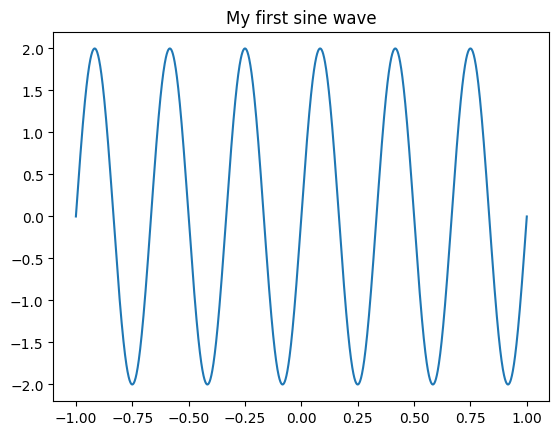

In [3]:
srate = 1000 #sampling rate of 1kHz
time = np.arange(-1, 1+1/srate, 1/srate)
freq = 3 #in Hz
amp = 2 #amplitude of sine wave

sine_wave = amp * np.sin(2*np.pi*freq*time)

plt.figure()
plt.plot(time, sine_wave)
#plt.axis([0,1,-3,3])
_=plt.title("My first sine wave")

# Comprobando principio de superposición

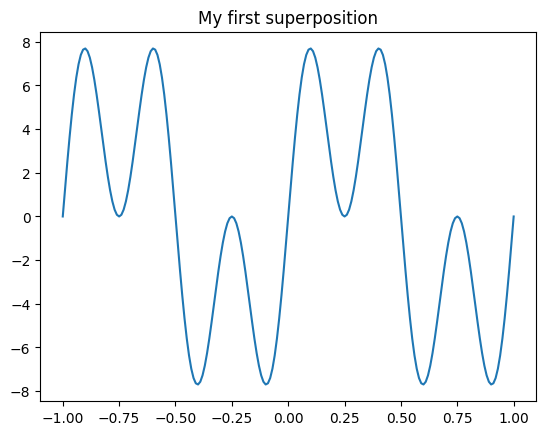

In [4]:
srate = 100. #sampling rate of 1kHz
time = np.arange(-1, 1+1/srate, 1/srate)
freq1 = 1 #in Hz
freq2 = 3
amp = 5 #amplitude of sine wave

sine_wave1 = amp*np.sin(2*np.pi*freq1*time)
sine_wave2 = amp*np.sin(2*np.pi*freq2*time)

superposition = sine_wave1 + sine_wave2

plt.figure()
plt.plot(time,superposition)
_=plt.title("My first superposition")

# Calculando la transformada de Fourier


/home/anderson/Documentos/Github/digital-image-processing/venv/lib/python3.11/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/anderson/Documentos/Github/digital-image-processing/venv/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


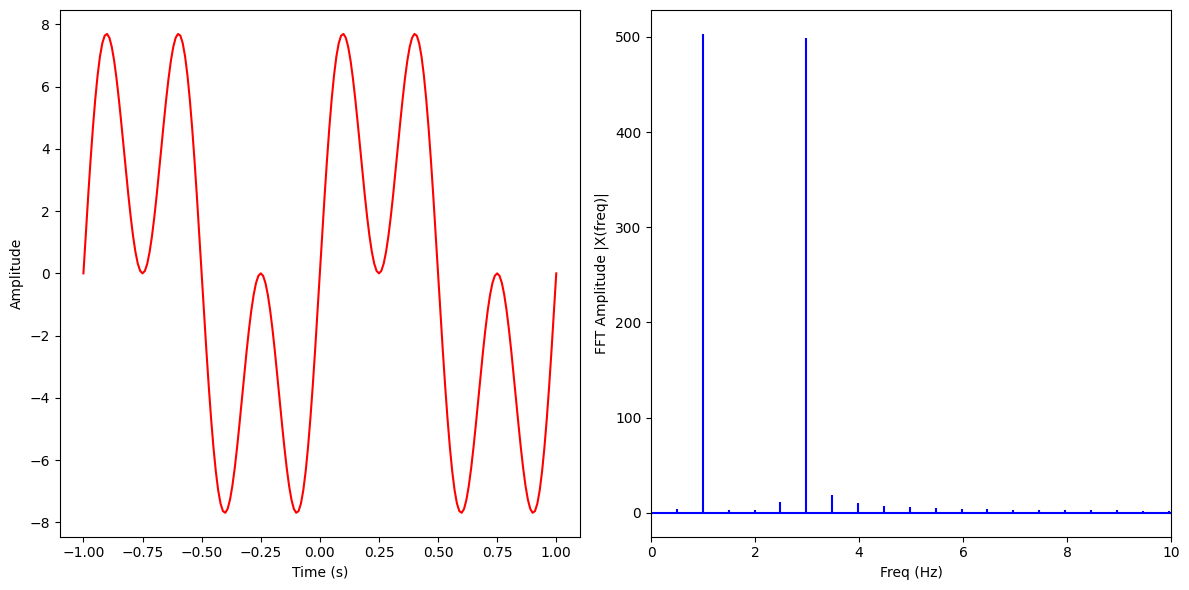

In [5]:
x = superposition
X = np.fft.fft(x)
N = len(X)
n = np.arange(N)
T = N/srate
freq = n/T

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.plot(time, np.fft.ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')


plt.subplot(122)
plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)

plt.tight_layout()
plt.show()

# Se pueden combinar múltiples senos de diferentes frecuencias para crear una señal más compleja.

<Figure size 640x480 with 0 Axes>

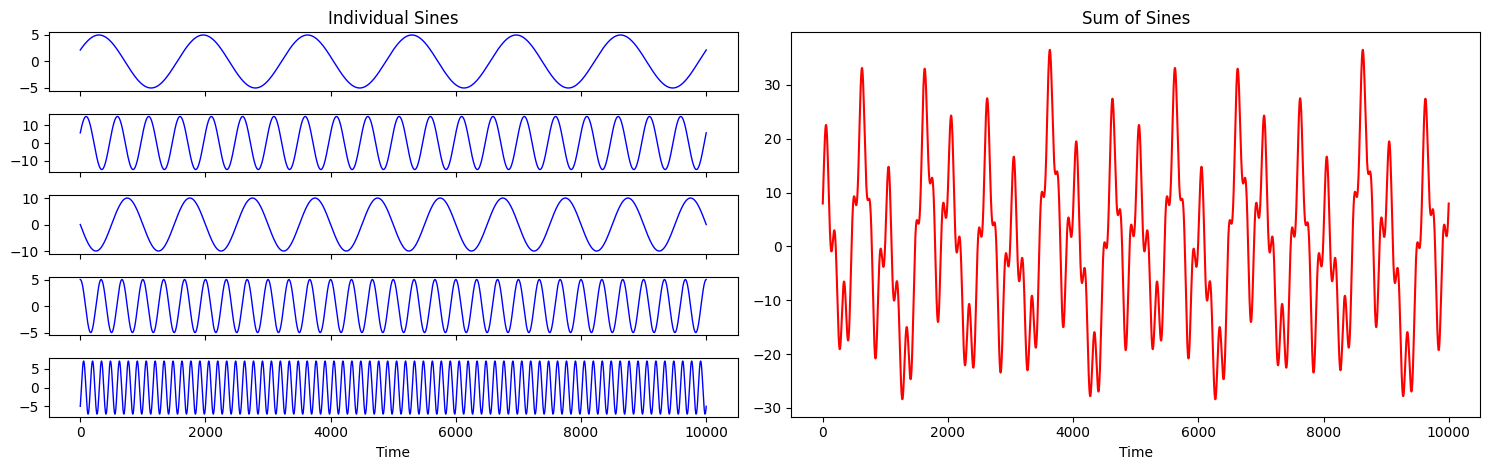

In [6]:
# Figure 11.2
srate = 5000. #sampling rate in Hz

#create arrays of frequencies, amplitudes, and phases to plot
frex = np.array([3, 10, 5 ,15, 35])
amplit = np.array([5, 15, 10, 5, 7])
phases = np.pi*np.array([1/7., 1/8., 1., 1/2., -1/4.])
time = np.arange(-1,1 +1/srate,1/srate)

sine_waves = np.zeros([len(frex), len(time)])
for fi in range(len(frex)):
    sine_waves[fi,:] = amplit[fi] * np.sin(2*np.pi*frex[fi]*time+phases[fi])

#plot each sine wave individually
fig = plt.figure()
plt.figure().set_figwidth(15)
fig.supylabel("Amplitude (a.u.)")

for fi in range(len(frex)):
    plt.subplot(len(frex), 2, 2*(fi+1)-1)
    plt.plot(sine_waves[fi,:], linewidth=1, color='b')
    if fi == 0:
        plt.title("Individual Sines")
    if fi != len(frex)-1:
        ax = plt.gca()
        ax.axes.xaxis.set_ticklabels([])
    elif fi == len(frex)-1:
        ax = plt.gca()
        ax.set_xlabel("Time")

#plot the sum of all sum waves
plt.subplot(1,2,2)
plt.plot(np.sum(sine_waves,axis=0), color='r')
plt.tight_layout()
_=plt.title("Sum of Sines")
_=plt.xlabel("Time")

# Al sumar dos señales se conserva la información de ambas señales

Por ejemplo, dos senos con diferentes amplitudes y frecuencias (de izquierda a derecha: A1=1  y A2=0.5; f1 = 3 y f2=8) se suman en el dominio del tiempo. La "fuerza" relativa de las frecuencias presentes en la señal correspondiente a la suma de los dos senos se resuelve en el dominio de la frecuencia.

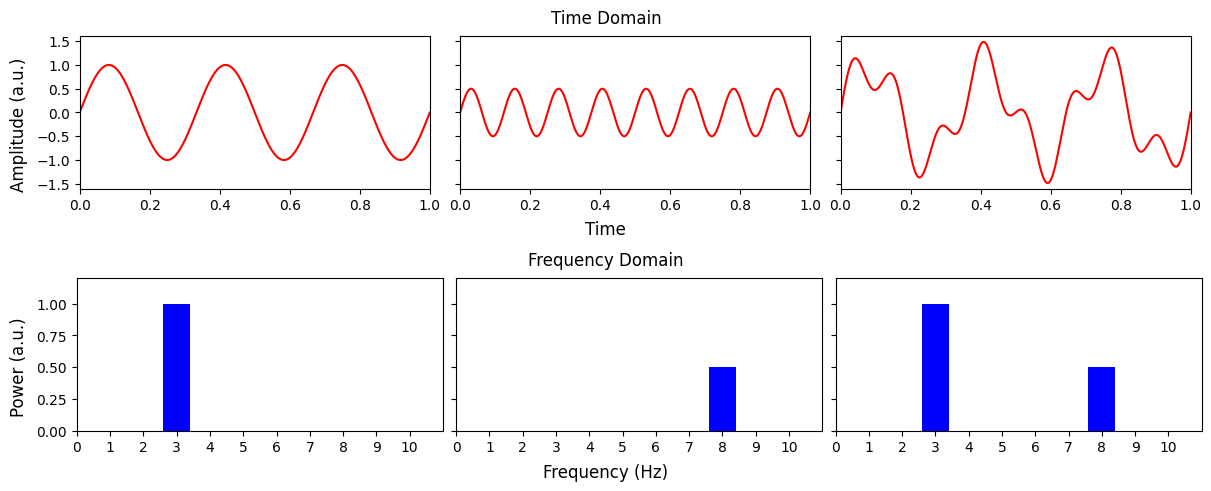

In [7]:
time = np.arange(-1, 1+1/srate, 1/srate)

#create three sine waves
s1 = np.sin(2*np.pi*3*time)
s2 = 0.5 * np.sin(2*np.pi*8*time)
s3 = s1 + s2

s_list = [s1, s2, s3]  # throw them into a list to analyze and plot

#plot the sine waves
fig = plt.figure(constrained_layout=True)
fig.set_figwidth(12)

(subfig1, subfig2) = fig.subfigures(2, 1) # create 2 subfigures, total 2x3
ax1 = subfig1.subplots(1, 3, sharex='col', sharey='row') # create 1x3 subplots on subfig1
ax2 = subfig2.subplots(1, 3, sharex='col', sharey='row') # create 1x3 subplots on subfig2

for i in range(3):
    ax1[i].plot(time, s_list[i], color='r')
    ax1[i].axis([0, 1, -1.6, 1.6])
    ax1[i].set_yticks(np.arange(-1.5, 2, .5))

    #numpy implementation of the fft
    f = np.fft.fft(s_list[i])/float(len(time))
    # we only have resolution up to SR/2 (Nyquist theorem)
    hz = np.linspace(0, srate/2., int(np.floor(len(time) / 2.) + 1)) 
    ax2[i].bar(hz,np.absolute(f[:len(hz)]*2), color='b')
    ax2[i].axis([0, 11, 0, 1.2])
    ax2[i].set_xticks(np.arange(0, 11))

subfig1.suptitle("Time Domain")
subfig1.supxlabel("Time")
subfig1.supylabel("Amplitude (a.u.)")

subfig2.suptitle("Frequency Domain")
subfig2.supxlabel("Frequency (Hz)")
subfig2.supylabel("Power (a.u.)") ;